<a href="https://colab.research.google.com/github/RickyHRazzaq/Data-Analytics-Portofolio/blob/main/Ricky_Hardian_Razzaq_Classification_based_on_text_data_from_ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
nltk.download('all')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
plt.xticks(rotation=70)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

import re

%matplotlib inline

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

In [ ]:
from nltk.tokenize import RegexpTokenizer
from nltk import WordNetLemmatizer, PorterStemmer

In [ ]:
#Pastikan telah memasukkan dataset ecommerceDataset ke Google Colab 
dataecom = pd.read_csv("ecommerceDataset.csv")

In [ ]:
dataecom.head()

,Household,"Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss.so bring home this elegant print that is lushed with rich colors that makes it nothing but sheer elegance to be to your friends and family.it would be treasured forever by whoever your lucky recipient is. Liven up your place with these intriguing paintings that are high definition hd graphic digital prints for home, office or any room."
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


In [ ]:
dataecom.columns = ['jenis', 'deskripsi']

In [ ]:
#memeriksa apakah terdapat missing value
dataecom.isna().sum()

jenis        0
deskripsi    1
dtype: int64

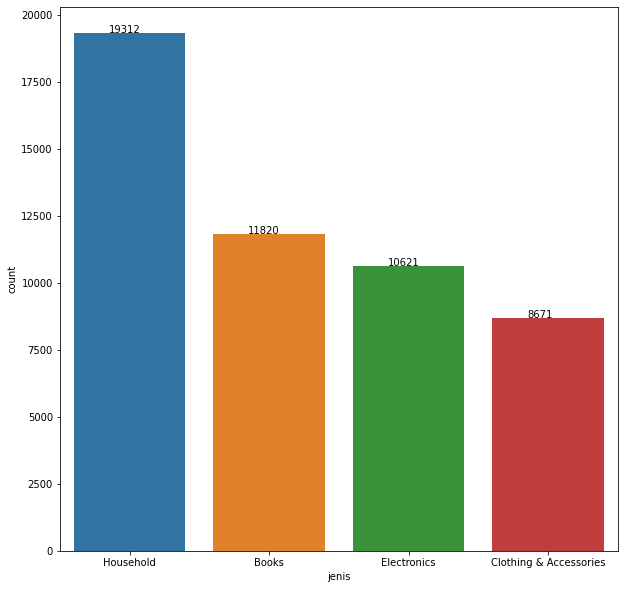

In [ ]:
# membuat bar plot untuk jumlah masing-masing jenis

plt.figure(figsize=(10,10))
ax = sns.countplot(x=dataecom["jenis"],  data=dataecom, order = dataecom["jenis"].value_counts().index )

for p, label in zip(ax.patches, dataecom["jenis"].value_counts()):   
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

In [ ]:
# menghapus missing value
dataecom.dropna()

In [ ]:
dataecom['jenis'].value_counts()

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
dataecom['encoded'] = labelencoder.fit_transform(dataecom['jenis'])

In [ ]:
dataecom[['jenis','encoded']].value_counts()

In [ ]:
X = dataecom['deskripsi']
y = dataecom['encoded']

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=42)

sss.get_n_splits(X, y)

In [ ]:
for train_index, test_index in sss.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index] 

In [ ]:
#fungsi untuk membuat semua huruf menjadi huruf kecil
def convert_ke_lowercase(teks):
    return teks.str.lower()

#fungsi untuk menghapus punctuation
def hapus_punctuations(teks):
    english_punctuation = string.punctuation
    translator = str.maketrans('','', english_punctuation)
    return str(teks).translate(translator)

#fungsi untuk menghapus stopwords
def hapus_stopwords(teks):
    from nltk.corpus import stopwords
    stopwords = set(stopwords.words('english'))
    return " ".join([word for word in str(teks).split() if word not in stopwords])

#fungsi menghapus karakter berulang
def hapus_karakter_berulang(teks):
    return re.sub(r'(.)1+', r'1', teks)

#fungsi menghapus numerik atau angka pada deskripsi
def hapus_numerik(teks):
    return re.sub('[0-9]+', '', teks)

#Fungsi tokenization
def tokenization(teks):
    tokenizer = RegexpTokenizer('\w+')
    teks = teks.apply(tokenizer.tokenize)
    return teks

#Fungsi lemmatizing teks. i.e, Converting some of the words to their root form. 
def lematization(teks):
    lm = WordNetLemmatizer()
    teks = [lm.lemmatize(word) for word in teks]
    return teks 

In [ ]:
def preprocess(teks):
    teks = convert_ke_lowercase(teks)
    teks = teks.apply(lambda x : hapus_punctuations(x))
    teks = teks.apply(lambda x : hapus_stopwords(x))
    teks = teks.apply(lambda x : hapus_karakter_berulang(x))
    teks = teks.apply(lambda x : hapus_numerik(x))
    teks = tokenization(teks)
    teks = teks.apply(lambda x : lematization(x))
    teks = teks.apply(lambda x: " ".join(x))
    return teks

In [ ]:
X_train = preprocess(X_train)

In [ ]:
X_train

In [ ]:
#Transformasi data teks menggunakan tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectoriser = TfidfVectorizer(ngram_range= (1,2), max_features= 300000)
vectoriser.fit(X_train)

In [ ]:
print(" No. of Feature words: ", len(vectoriser.get_feature_names()))

In [ ]:
# Transforming The training data using the vectoriser
X_train = vectoriser.transform(X_train)

In [ ]:
#Random Forest Model
from random import Random
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

random_forest_classifier = RandomForestClassifier(n_estimators= 10, criterion= 'entropy', random_state= 42)
random_forest_classifier.fit(X_train, y_train)

In [ ]:
# XGBoost model
xgb_boost_classifier = XGBClassifier()
xgb_boost_classifier.fit(X_train, y_train)

In [ ]:
#evaluasi performansi kedua model
from sklearn.metrics import accuracy_score

X_test = preprocess(X_test)
X_test = vectoriser.transform(X_test) 

random_forest_predictions = random_forest_classifier.predict(X_test)
xgb_predictions = xgb_boost_classifier.predict(X_test)

random_forest_score = accuracy_score(y_test, random_forest_predictions)
xgb_score = accuracy_score(y_test, xgb_predictions)

print("Random Forest Classifier Accuracy: ", random_forest_score * 100 , "%")
print("XGBoost Classifier Accuracy: ", xgb_score * 100 , "%")

In [ ]:
def predict_custom(inp):
    inp = pd.Series(inp)
    inp = preprocess(inp)
    inp = [inp[0],]
    inp = vectoriser.transform(inp)
    prediction = random_forest_classifier.predict(inp)
    prediction = prediction[0]

    interpretations = {
        0 : "Books",
        1 : "Clothing and Accessories",
        2 : "Electronics",
        3 : "Household"
    }

    for i in interpretations.keys():
        if i == prediction:
            return interpretations[i]

In [ ]:
inp = "1-Sentence-Summary: Atomic Habits is the definitive guide to breaking bad behaviors and adopting good ones in four steps, showing you how small, incremental, everyday routines compound into massive, positive change over time"
print("prediction inp: ", predict_custom(inp))

prediction inp:  Books
